## Day1 - Data Set selection & Discussion on Data Preprocessing (Date - 20/11/2023)

### Data Set selection

In [3]:
# we've selected dataset of from Kaggle
#link is - https://www.kaggle.com/datasets/oscarm524/predicting-returns-of-discounted-articles-sales?select=realclass_DMC_2016.txt

In [4]:
import pandas as pd             # importing pandas library to use pandas dataframe
from datetime import datetime   # importing datetime
import numpy as np              # importing numpy
import matplotlib.pyplot as plt         # importing matplotlib for gragh plotting 




In [5]:
# loading dataset
order_df =  pd.read_csv("orders_train.txt", sep = ';')

In [6]:
order_df.head()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
1,a1000001,2014-01-01,i1000550,3854,44,3.0,1,20.00,39.99,0,0.0,c1010575,2,BPRG,0
2,a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
3,a1000002,2014-01-01,i1001999,1992,38,8.0,1,49.99,49.99,0,0.0,c1045905,4,BPRG,1
4,a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0


In [7]:
#To check column names in the data set
order_df.columns        

Index(['orderID', 'orderDate', 'articleID', 'colorCode', 'sizeCode',
       'productGroup', 'quantity', 'price', 'rrp', 'voucherID',
       'voucherAmount', 'customerID', 'deviceID', 'paymentMethod',
       'returnQuantity'],
      dtype='object')

### Data Preprocessing

Following aspects of data set to be explored in terms of data preprocessing - 

1) check data types
2) check the unique customer
3) change the date in dateformat
4) check the date duration
5) For each customer, when is the last order date and first order date
6) Total qty of order, Total qty of return and Total Revenue against individual customer
7) order placed vs return against each unique customer (Order count > Return Count)
8) Check by product group if any group having max return 


ESLII and ISLR - these two books have been suggested for reading

In [8]:
#Checking the shape of the data set
order_df.shape

(2325165, 15)

In [9]:
# To check how many times return has happened
order_df[order_df['returnQuantity']>0].shape        

(1208009, 15)

In [10]:
order_df['returnQuantity'].value_counts()           # To check count of unique values of return(>0) and non-return(=0)

returnQuantity
1    1204005
0    1117156
2       3749
3        192
4         35
5         28
Name: count, dtype: int64

1) Checking Data Types

In [11]:
# Data type checking
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325165 entries, 0 to 2325164
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   orderID         object 
 1   orderDate       object 
 2   articleID       object 
 3   colorCode       int64  
 4   sizeCode        object 
 5   productGroup    float64
 6   quantity        int64  
 7   price           float64
 8   rrp             float64
 9   voucherID       object 
 10  voucherAmount   float64
 11  customerID      object 
 12  deviceID        int64  
 13  paymentMethod   object 
 14  returnQuantity  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 266.1+ MB


In [12]:
# Second method to check data type
order_df.dtypes

orderID            object
orderDate          object
articleID          object
colorCode           int64
sizeCode           object
productGroup      float64
quantity            int64
price             float64
rrp               float64
voucherID          object
voucherAmount     float64
customerID         object
deviceID            int64
paymentMethod      object
returnQuantity      int64
dtype: object

2) Check Unique Customer

In [13]:
unique_customer = order_df['customerID'].nunique()
print(unique_customer)

311369


3) Change Date in Dateformat

In [14]:
#To check data type of 'order Date'
type(order_df['orderDate'].iloc[0])         

str

In [15]:
# Date is in format '%y, %m, %d'
order_df['orderDate'].tail(10)              

2325155    2015-09-30
2325156    2015-09-30
2325157    2015-09-30
2325158    2015-09-30
2325159    2015-09-30
2325160    2015-09-30
2325161    2015-09-30
2325162    2015-09-30
2325163    2015-09-30
2325164    2015-09-30
Name: orderDate, dtype: object

In [16]:
# To create a copy of original data frame of data set
order_df_copy = order_df.copy()                 

In [17]:
# Converting datetime from string to Datetime format
order_df['orderDate']  = pd.to_datetime(order_df['orderDate'])    
print(order_df['orderDate'].tail(10))

2325155   2015-09-30
2325156   2015-09-30
2325157   2015-09-30
2325158   2015-09-30
2325159   2015-09-30
2325160   2015-09-30
2325161   2015-09-30
2325162   2015-09-30
2325163   2015-09-30
2325164   2015-09-30
Name: orderDate, dtype: datetime64[ns]


In [18]:
#Checked total duration of the dataset
last_orderDate = order_df['orderDate'].max()
first_orderDate = order_df['orderDate'].min()
date_duration = (last_orderDate - first_orderDate)
print('Duration of Data Set is', date_duration.total_seconds()/(84000*7), 'weeks')

Duration of Data Set is 93.6 weeks


4) For each customer, when is the last order date and first order date

In [19]:
df_customer_groupby = order_df.groupby('customerID')            #grouping by customerID
df_customer_groupby.size()                                      #Checking size of data series

customerID
c1000001    186
c1000002     15
c1000003      5
c1000004      9
c1000005     89
           ... 
c1319615      1
c1319850      1
c1320021      2
c1320568      4
c1320877     15
Length: 311369, dtype: int64

In [20]:
#Checking first row only of the grouped data
df_customer_groupby.first()                         

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,deviceID,paymentMethod,returnQuantity
customerID,,,,,,,,,,,,,,
c1000001,a1001465,2014-01-03,i1003077,3999,I,17.0,1,27.99,27.99,0,0.0,2,BPRG,0
c1000002,a1008702,2014-01-11,i1002442,1001,38,14.0,1,50.00,99.99,0,0.0,2,BPRG,1
c1000003,a1337883,2014-10-29,i1001267,2001,34,4.0,1,69.99,69.99,v1000278,10.0,2,BPRG,0
c1000004,a1153155,2014-05-25,i1000860,1000,36,3.0,1,12.99,12.99,0,0.0,3,BPRG,1
c1000005,a1013133,2014-01-16,i1001175,2001,40,4.0,1,59.99,59.99,0,0.0,3,BPRG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1319615,a1148000,2014-05-22,i1002105,6644,40,9.0,1,59.99,59.99,0,0.0,2,BPRG,0
c1319850,a1743594,2015-09-30,i1003202,1093,42,3.0,1,30.00,39.99,0,0.0,2,CBA,0
c1320021,a1738016,2015-09-25,i1003589,7165,28,2.0,1,69.99,69.99,0,0.0,2,PAYPALVC,0


In [21]:
# To find recent and furthest purchase date of each customer  
cst_recency = df_customer_groupby.agg(first_date = ('orderDate', np.min),
                                       last_date = ('orderDate', np.max)) 

#To calculate the duration b/w first and last purchase          
cst_recency['Duration'] = cst_recency['last_date'] - cst_recency['first_date']      
cst_recency.head()


,first_date,last_date,Duration
customerID,,,
c1000001,2014-01-03,2015-09-21,626 days
c1000002,2014-01-11,2014-11-07,300 days
c1000003,2014-10-29,2014-10-29,0 days
c1000004,2014-05-25,2015-07-15,416 days
c1000005,2014-01-16,2015-08-31,592 days


In [22]:
cst_recency_sorted = cst_recency.sort_values('last_date', ascending=True)              #Sort by last purchase date
cst_recency_sorted[cst_recency_sorted['Duration'] > '0 days'].head(10)                 #Filtering out one time customer


,first_date,last_date,Duration
customerID,,,
c1075702,2014-01-01,2014-01-03,2 days
c1042723,2014-01-02,2014-01-04,2 days
c1056160,2014-01-01,2014-01-04,3 days
c1089919,2014-01-03,2014-01-04,1 days
c1089318,2014-01-01,2014-01-04,3 days
c1064910,2014-01-01,2014-01-04,3 days
c1089712,2014-01-02,2014-01-04,2 days
c1089635,2014-01-02,2014-01-04,2 days
c1078269,2014-01-02,2014-01-05,3 days


6) Total order qty, Total return qty and Total Revenue against individual customer

In [39]:

total_qty_return_price = df_customer_groupby.sum('quantity')[['quantity','price','returnQuantity']] 

#Calculating return percentage of each customer
total_qty_return_price['returnPercentage'] = total_qty_return_price['returnQuantity']/total_qty_return_price['quantity']*100 

#Filtering out customers > 0% return
total_qty_return_price[total_qty_return_price['returnPercentage'] > 0]


,quantity,price,returnQuantity,returnPercentage
customerID,,,,
c1000001,186,5123.39,89,47.849462
c1000002,15,859.86,12,80.000000
c1000003,5,175.97,2,40.000000
c1000004,9,251.92,5,55.555556
c1000005,88,3579.26,60,68.181818
...,...,...,...,...
c1319460,10,474.91,5,50.000000
c1319461,8,479.93,6,75.000000
c1319524,15,388.94,9,60.000000


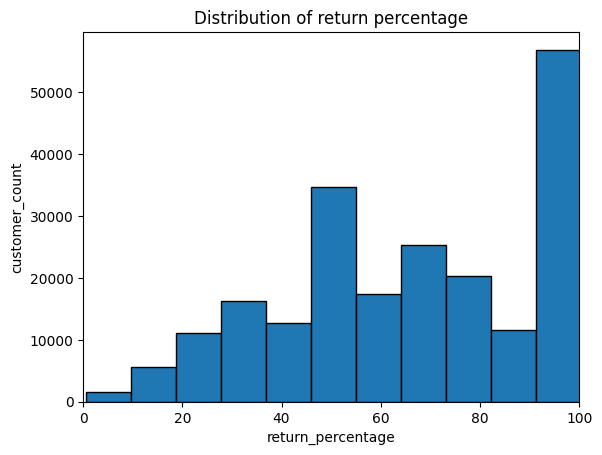

In [24]:
# Histogram plot of return percentage (return percentage = 0 has been removed)

plt.hist(total_qty_return_price[total_qty_return_price['returnPercentage'] > 0]['returnPercentage'], bins = 22, edgecolor = 'black')
plt.title('Distribution of return percentage')
plt.xlabel('return_percentage')
plt.ylabel('customer_count')
plt.xlim(0,100)
plt.show()

7) order placed vs return against each unique customer (Order count > Return Count)

In [25]:
#shipment wise return percentage of individual customer
df_customer_groupby.first()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,deviceID,paymentMethod,returnQuantity
customerID,,,,,,,,,,,,,,
c1000001,a1001465,2014-01-03,i1003077,3999,I,17.0,1,27.99,27.99,0,0.0,2,BPRG,0
c1000002,a1008702,2014-01-11,i1002442,1001,38,14.0,1,50.00,99.99,0,0.0,2,BPRG,1
c1000003,a1337883,2014-10-29,i1001267,2001,34,4.0,1,69.99,69.99,v1000278,10.0,2,BPRG,0
c1000004,a1153155,2014-05-25,i1000860,1000,36,3.0,1,12.99,12.99,0,0.0,3,BPRG,1
c1000005,a1013133,2014-01-16,i1001175,2001,40,4.0,1,59.99,59.99,0,0.0,3,BPRG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1319615,a1148000,2014-05-22,i1002105,6644,40,9.0,1,59.99,59.99,0,0.0,2,BPRG,0
c1319850,a1743594,2015-09-30,i1003202,1093,42,3.0,1,30.00,39.99,0,0.0,2,CBA,0
c1320021,a1738016,2015-09-25,i1003589,7165,28,2.0,1,69.99,69.99,0,0.0,2,PAYPALVC,0


In [26]:
#to check order count
order_count_df = df_customer_groupby['orderID'].nunique()
order_count_df

customerID
c1000001    90
c1000002    10
c1000003     1
c1000004     3
c1000005    26
            ..
c1319615     1
c1319850     1
c1320021     2
c1320568     1
c1320877     7
Name: orderID, Length: 311369, dtype: int64

In [27]:
#to cross-check customerID wise order count
order_df[order_df['customerID'] == 'c1000005']['orderID'].nunique()

26

In [28]:
df_customer_groupby['returnQuantity'].dtype

customerID
c1000001    int64
c1000002    int64
c1000003    int64
c1000004    int64
c1000005    int64
            ...  
c1319615    int64
c1319850    int64
c1320021    int64
c1320568    int64
c1320877    int64
Name: returnQuantity, Length: 311369, dtype: object

In [34]:
df_customer_groupby.filter(lambda x: x['returnQuantity'].min() > 0)['orderID'].nunique()  #[df_customer_groupby['returnQuantity']>0]

61765

In [33]:
#checked average price per piece
order_df['price'].sum()/order_df['quantity'].sum()

35.5575813266102

In [52]:
df_groupby_orderID = order_df.groupby('orderID')
df_groupby_orderID.first()

,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
orderID,,,,,,,,,,,,,,
a1000001,2014-01-01,i1000382,1972,44,3.0,1,10.00,29.99,0,0.0,c1010575,2,BPRG,0
a1000002,2014-01-01,i1001991,2974,38,8.0,1,35.00,49.99,0,0.0,c1045905,4,BPRG,0
a1000003,2014-01-01,i1001942,1968,42,8.0,1,10.00,35.99,0,0.0,c1089295,2,PAYPALVC,0
a1000004,2014-01-01,i1002457,1001,42,14.0,1,89.99,89.99,0,0.0,c1050116,3,BPRG,1
a1000005,2014-01-01,i1000366,1968,42,3.0,1,15.00,39.99,0,0.0,c1089296,2,BPRG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a3468747,2014-05-27,i1000783,1000,34,3.0,1,25.99,25.99,0,0.0,c1144866,5,RG,0
a3468750,2014-09-02,i1003308,1001,34,50.0,1,229.99,229.99,0,0.0,c1144866,5,RG,0
a3468752,2015-04-22,i1004001,8888,A,NaN,1,10.00,NaN,v1000706,0.0,c1074506,5,RG,0


In [43]:
order_df['orderID'].nunique()

738698

In [58]:
df_group_return = df_groupby_orderID.filter(lambda x: x['returnQuantity'].min() > 0)

TypeError: NDFrame.first() missing 1 required positional argument: 'offset'

In [61]:
df_group_return

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
9,a1000004,2014-01-01,i1002457,1001,42,14.0,1,89.99,89.99,0,0.0,c1050116,3,BPRG,1
10,a1000005,2014-01-01,i1000366,1968,42,3.0,1,15.00,39.99,0,0.0,c1089296,2,BPRG,1
11,a1000005,2014-01-01,i1000406,3972,40,3.0,1,10.00,29.99,0,0.0,c1089296,2,BPRG,1
12,a1000005,2014-01-01,i1000406,3972,42,3.0,1,10.00,29.99,0,0.0,c1089296,2,BPRG,1
18,a1000008,2014-01-01,i1001642,1001,44,7.0,1,110.00,149.99,0,0.0,c1089298,2,BPRG,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325132,a1744169,2015-09-30,i1003185,1117,42,3.0,1,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1
2325133,a1744169,2015-09-30,i1003207,1096,42,3.0,1,29.99,29.99,v1000415,10.0,c1268960,2,BPRG,1
2325158,a1744175,2015-09-30,i1001462,1090,40,6.0,1,39.99,39.99,0,0.0,c1055877,3,CBA,1
2325159,a1744175,2015-09-30,i1003229,2096,38,3.0,1,35.99,35.99,0,0.0,c1055877,3,CBA,1


In [51]:
df_group_return['orderID'].nunique()

177382

In [50]:
df_group_returnCount_customer = df_group_return.groupby('customerID')
df_group_returnCount_customer.size()
df_group_returnCount_customer.first()

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,deviceID,paymentMethod,returnQuantity
customerID,,,,,,,,,,,,,,
c1000001,a1004977,2014-01-07,i1003082,1999,I,17.0,1,25.99,25.99,0,0.0,2,BPRG,1
c1000002,a1008702,2014-01-11,i1002442,1001,38,14.0,1,50.00,99.99,0,0.0,2,BPRG,1
c1000004,a1645837,2015-07-12,i1001699,3093,36,8.0,1,39.99,39.99,0,0.0,3,BPRG,1
c1000005,a1105032,2014-04-15,i1000104,1978,40,1.0,1,59.99,59.99,0,0.0,2,BPRG,1
c1000006,a1150127,2014-05-23,i1002109,1961,36,9.0,1,59.99,59.99,0,0.0,3,CBA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1319433,a1744063,2015-09-30,i1002232,3097,36,13.0,1,69.99,69.99,0,0.0,2,BPRG,1
c1319438,a1744071,2015-09-30,i1003952,1114,38,1.0,1,69.99,69.99,0,0.0,2,BPRG,1
c1319439,a1744074,2015-09-30,i1000397,1117,36,3.0,1,17.99,17.99,0,0.0,2,BPLS,1


In [67]:
def check_positive(series):
    return series > 0

In [68]:
df_groupby_orderID['returnQuantity'].apply(check_positive)

orderID          
a1000001  0          False
          1          False
a1000002  2          False
          3           True
a1000003  4          False
                     ...  
a3468750  871628     False
          871629     False
a3468752  1648717    False
a3468755  1839542    False
a3468758  2112826    False
Name: returnQuantity, Length: 2325165, dtype: bool